<a href="https://colab.research.google.com/github/parasgulati8/Data-Analysis/blob/master/Asurion_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive/'My Drive'/'Colab Notebooks'/dataset_exercise_asurion

/content/drive/My Drive/Colab Notebooks/dataset_exercise_asurion


# Section 1: Imports


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
import statsmodels.api as sm
sns.set_style("darkgrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Section 2: EDA

In [ ]:
data = pd.read_csv('Call Sample.csv')

In [ ]:
data.describe()

,Agent,Week,Service Time,Quality Score
count,240.000000,240.000000,231.000000,234.000000
mean,24.500000,3.000000,475.125541,6.895299
std,13.882351,1.417169,40.263337,1.222263
min,1.000000,1.000000,402.000000,4.300000
25%,12.750000,2.000000,451.000000,5.900000
50%,24.500000,3.000000,470.000000,6.900000
75%,36.250000,4.000000,511.000000,7.700000
max,48.000000,5.000000,550.000000,9.300000


In [ ]:
data.head()

,Site,Client,Supervisor,Agent,Week,Service Time,Quality Score
0,East,A,Brian,41,1,509.0,6.5
1,East,A,Brian,41,2,505.0,6.9
2,East,A,Brian,41,3,NaN,5.9
3,East,A,Brian,41,4,505.0,7.1
4,East,A,Brian,41,5,511.0,9.1


In [ ]:
data.isna().sum()

Site             0
Client           0
Supervisor       0
Agent            0
Week             0
Service Time     9
Quality Score    6
dtype: int64

In [ ]:
data.nunique()

Site              3
Client            2
Supervisor       22
Agent            48
Week              5
Service Time     65
Quality Score    49
dtype: int64

In [ ]:
def clean_data(data):
  # dropping null values
  data.dropna(inplace=True)

  # Cleaning the Supervisor names
  data['Supervisor'] = data['Supervisor'].str.title()
  data.Supervisor.replace({'Jorrge': 'Jorge', 'Sara': 'Sarah', 'Johnathan':'John', 'Adreew': 'Andrew'}, inplace=True)
  return data

In [ ]:
data = clean_data(data)

In [ ]:
data.Supervisor.nunique()

12

In [ ]:
# Correlation matrix
def plot_corr_matrix(df, graph_width=10):
    """
    Function creates a graph of the correlation matrix
    
    :return: None
    :rtype: NoneType
    """
    #Set graph constants
    FILENAME = 'Call Samples.csv'
    DPI = 80
    FACECOLOR = 'w' 
    EDGECOLOR = 'k'
    
    #Gen Plot Data
    # keep columns where there are more than 1 unique values
    df = df[[col for col in df if df[col].nunique() > 1]] 
    corr = df.corr()
    
    #Create plot object
    plt.figure(num=None, 
               figsize=(graph_width, graph_width), 
               dpi=DPI, 
               facecolor=FACECOLOR, 
               edgecolor=EDGECOLOR
              )
    corrMat = plt.matshow(corr, fignum = 1)
    
    #Plot Formatting
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    
    # plt.savefig('corr_matrix' + str(df.shape)+ '.jpg')
    plt.show()

In [ ]:
# converting the categorical values to one-hot encoding
data_ = pd.get_dummies(data, columns=['Site', 'Client', 'Supervisor', 'Agent'])

# converting time in seconds to hours
data_['Service Time'] = (data['Service Time']/60).round(2)

Inference: The Service Time and Quality Score are not correlated. 

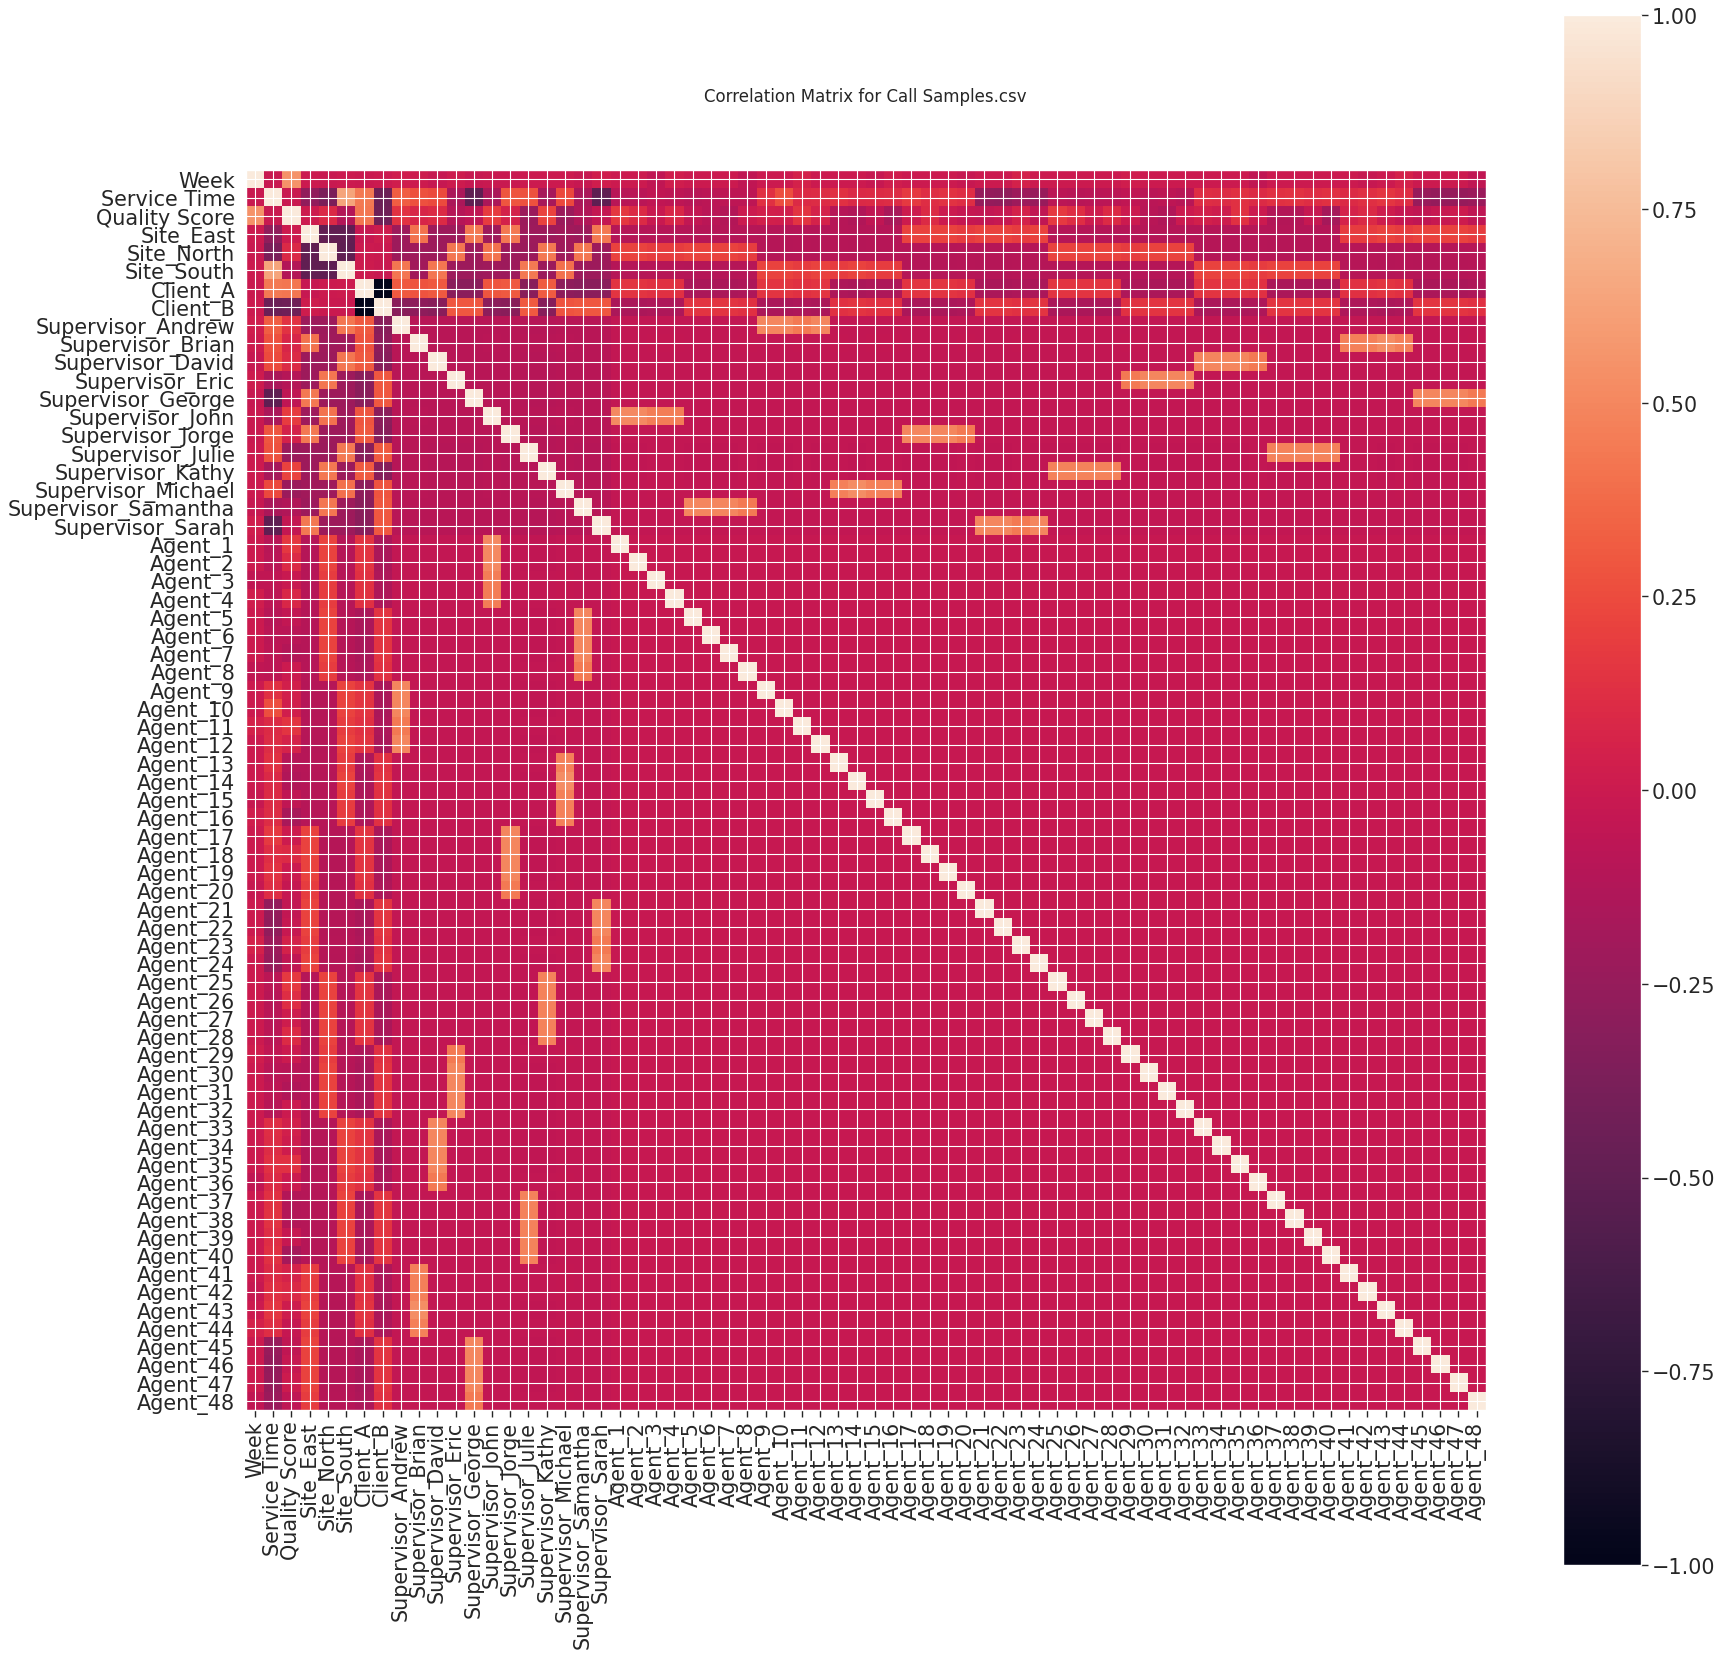

In [ ]:
plotCorrelationMatrix(data_, 25)

Plotting Service Time vs Quallity Score to find the potential relationship between these two 


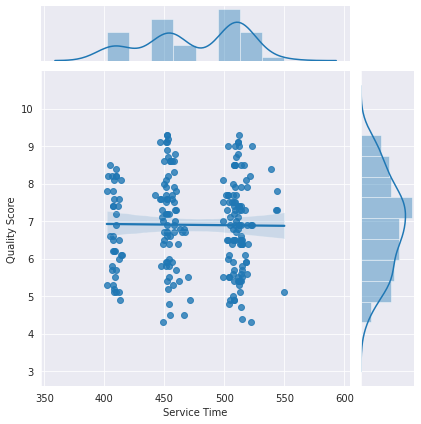

In [ ]:
sns.jointplot(x="Service Time", y="Quality Score", data=data, kind="reg");
plt.savefig('Service_vs_quality.jpg')

Finding the relationship based on clients

## 2.1 Client Level Analysis

In [ ]:
# mean of service time and quality score grouped by client
data.groupby('Client').mean()

,Agent,Week,Service Time,Quality Score
Client,,,,
A,22.31250,2.991071,493.062500,7.420536
B,26.79646,2.991150,457.353982,6.383186


Plotting the mean service time and quality score for both client

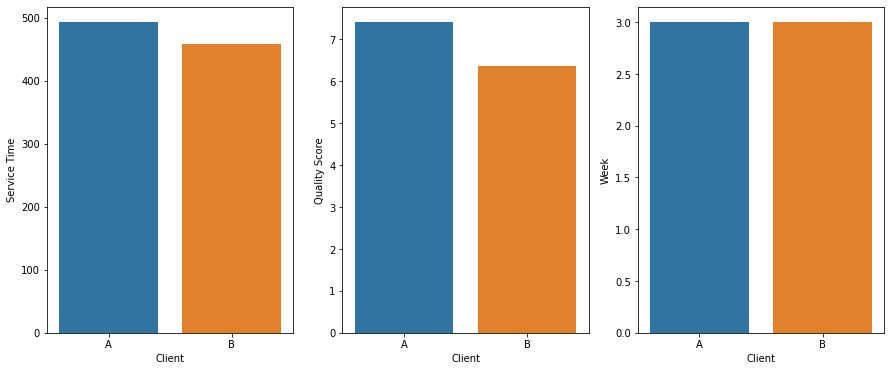

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.barplot(x = data.groupby('Client').mean().index , y = 'Service Time', data = data.groupby('Client').mean())
plt.subplot(1,3,2)
sns.barplot(x = data.groupby('Client').mean().index , y = 'Quality Score', data = data.groupby('Client').mean())
plt.subplot(1,3,3)
sns.barplot(x = data.groupby('Client').mean().index , y = 'Week', data = data.groupby('Client').mean())

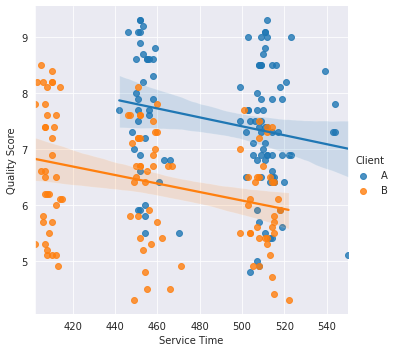

In [ ]:
sns.lmplot(x="Service Time", y="Quality Score", hue="Client", data= data, robust=True);
plt.savefig('Client_dependence.jpg')

## 2.2 Relationship betweeen Service time and Quality Score conditioned on Week

In [ ]:
# Median quality score per week
data.groupby(by='Week').median().iloc[:,-2:]#.plot()

,Service Time,Quality Score
Week,,
1,471.0,6.40
2,499.0,6.10
3,459.0,6.85
4,459.0,7.50
5,501.0,7.80


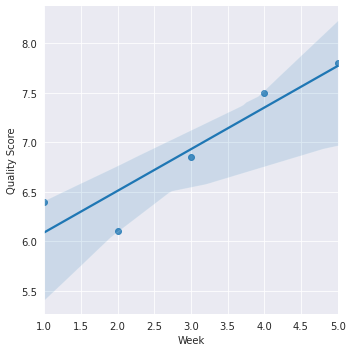

In [ ]:
sns.set_style("darkgrid")
sns.lmplot(x='Week', y='Quality Score', data= data.groupby(by='Week').median().reset_index())
plt.savefig('week_vs_quality.jpg')

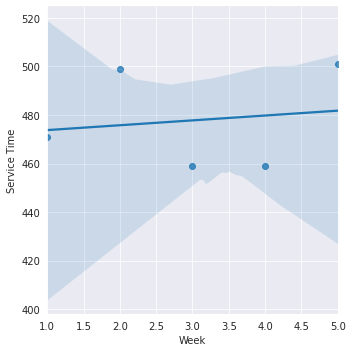

In [ ]:
sns.lmplot(x='Week', y='Service Time', data= data.groupby(by='Week').median().reset_index())
# plt.savefig('week_vs_quality.jpg')

In [ ]:
def plot_week_for_client(client):
  """
  Function plots the Service timevs week and Quality score vs week for a given site

  :return : None
  """
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.xlabel('Weeks')
  plt.ylabel('Service Time')
  plt.subplot(1,2,1)
  data[data.Client == client].groupby('Week').mean()['Service Time'].plot()
  plt.subplot(1,2,2)
  plt.xlabel('Weeks')
  plt.ylabel('Quality Score')
  data[data.Client == client].groupby('Week').mean()['Quality Score'].plot()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


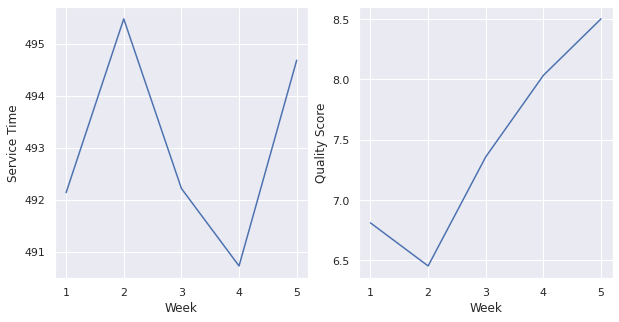

In [ ]:
# week vs service time and week vs quality score for client A

plot_week_for_client('A')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


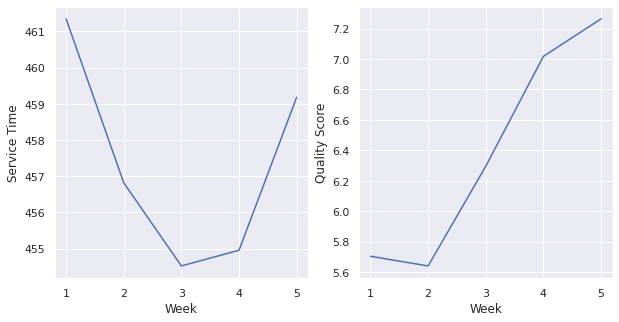

In [ ]:
# week vs service time and week vs quality score for client B

plot_week_for_client('B')

In [ ]:
def plot_site(site):
  """
  Function plots the Service timevs week and Quality score vs week for a given site

  :return : None
  """
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.xlabel('Weeks')
  plt.ylabel('Service Time')
  data[data.Site == site].groupby('Week').mean()['Service Time'].plot()
  plt.subplot(1,2,2)
  plt.xlabel('Weeks')
  plt.ylabel('Quality Score')
  data[data.Site == site].groupby('Week').mean()['Quality Score'].plot()

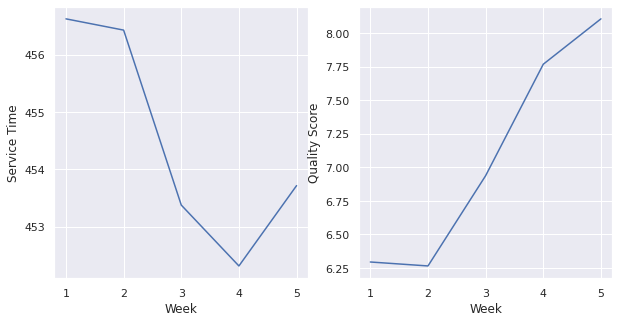

In [ ]:
plot_site('North')

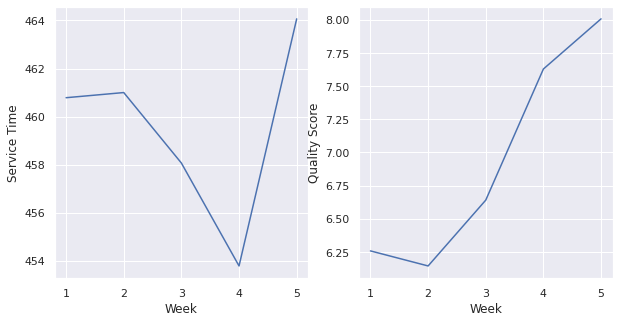

In [ ]:
plot_site('East')

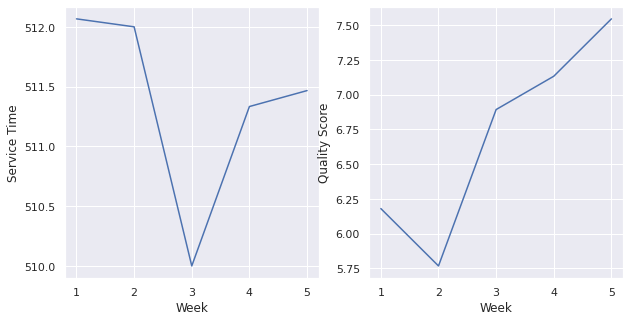

In [ ]:
plot_site('South')

General trend observed :
1. As the weeks pass y, the Quality Score imporves
2. As the weeks pass y, the Service Time first decreases and then increases again

## 2.3 Relationship betweeen Service time and Quality Score conditioned on Site


In [ ]:
data.groupby('Site').mean().iloc[:, -2:]

,Service Time,Quality Score
Site,,
East,459.621622,6.924324
North,454.460526,7.068421
South,511.373333,6.704000


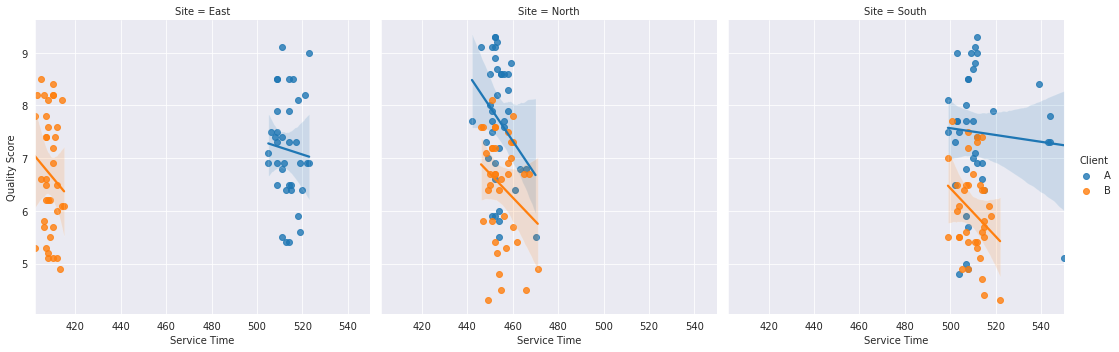

In [ ]:
sns.lmplot(x="Service Time", y="Quality Score", hue ='Client' ,col="Site", data= data, col_wrap=3, robust=True );
plt.savefig('Sites.jpg')

In [ ]:
#average time for site east for client A and B
data[(data.Site=='East')].groupby('Client').mean().iloc[:, -2:]

,Service Time,Quality Score
Client,,
A,513.472222,7.158333
B,408.605263,6.702632


In [ ]:
#average time for site North for client A and B
data[(data.Site=='North')].groupby('Client').mean().iloc[:, -2:]

,Service Time,Quality Score
Client,,
A,453.947368,7.700000
B,454.973684,6.436842


In [ ]:
#average time for site South for client A and B
data[(data.Site=='South')].groupby('Client').mean().iloc[:, -2:]

,Service Time,Quality Score
Client,,
A,512.842105,7.389474
B,509.864865,6.000000


In [ ]:
# Supervisors at Site North
data[(data.Site=='North')].Supervisor.unique()

array(['John', 'Kathy', 'Eric', 'Samantha'], dtype=object)

In [ ]:
# Finding mean service time and quality score for each supervisor, dealing with client A 
data[(data.Site=='North') & (data.Client=='A')].groupby('Supervisor').mean().sort_values('Quality Score', ascending = False).iloc[:,-2:]

,Service Time,Quality Score
Supervisor,,
Kathy,453.500000,7.750000
John,454.444444,7.644444


In [ ]:
def plot_supervisor(site, client, factor):
  """
  Function to plot mean 'Service Time' and 'Quality Score' for different Supervisors
  params:
  site: (str) One of the sites from 'North', 'East' and 'South'
  client: (str) client A or B
  factor: (str) That factor to e plotted, either Service Time or Qality Score

  :returns: None
  """
  # set the font size and figure size
  sns.set(font_scale=1)
  plt.figure(figsize=(3,1))

  # data filtered by site and client, followed by calculating mean of service time and quality score for supervisors 
  df = data[(data.Site==site) & (data.Client==client)].groupby('Supervisor').mean().sort_values('Quality Score', ascending = False).reset_index()
  
  # plotting and labelling the bars with values 
  g = sns.barplot(x = factor, y='Supervisor', data =df, orient='h', order=df.Supervisor.values)
  for index, row in north_A_Sup.iterrows():
    g.text(row[factor]+0.5, index, round(row[factor],2), color='black', ha='center')

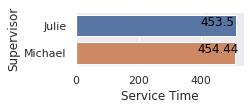

In [ ]:
plot_supervisor('South', 'B', 'Service Time')

In [ ]:
def plot_agents(site, sup, factor):
  """
  Function to plot mean 'Service Time' and 'Quality Score' for different agents
  params:
  site: (str) One of the sites from 'North', 'East' and 'South'
  client: (str) client A or B
  factor: (str) That factor to e plotted, either Service Time or Qality Score

  :returns: None
  """
  # data filtered by site and supervisor, followed by calculating mean of service time and quality score for each agent 
  df = data[(data.Site==site) & (data.Supervisor==sup)].groupby('Agent').mean().sort_values('Quality Score', ascending = False).reset_index()

  # plotting and labelling the bars with values 
  g=sns.barplot(factor,'Agent',data = df, orient='h', order=df.Agent.values)
  for index, row in df.iterrows():
    g.text(row[factor]+0.5, index, round(row[factor],2), color='black', ha='center')

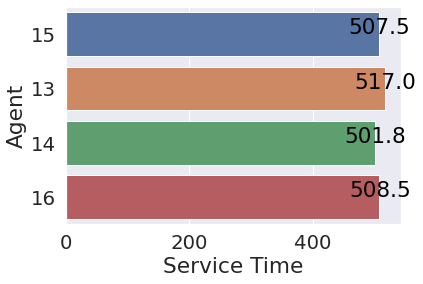

In [ ]:
plot_agents('South', 'Michael', 'Service Time')

## 2.4 Relationship betweeen Service time and Quality Score conditioned on Supervisor  

In [ ]:
data.Supervisor.unique()

array(['Brian', 'Jorge', 'Jorrge', 'Sara', 'Sarah', 'Johnathan', 'John',
       'Kathy', 'Eric', 'Samantha', 'Adreew', 'Andrew', 'David', 'Julie',
       'Michael'], dtype=object)

In [ ]:
# Finding correlation between service time and quality score for each Supervisor

for s in data.Supervisor.unique():
  sup = data[data.Supervisor ==s].iloc[:, -2:].corr().iloc[0, 1].round(2)
  print (s, sup)


Brian 0.14
Jorge -0.19
George -0.02
Sarah -0.23
John -0.48
Kathy 0.09
Eric 0.29
Samantha -0.51
Andrew -0.17
David 0.09
Julie -0.5
Michael -0.15


For each superisor, plotting the service time vs quality score.

The plot gives a regression line for each supervisor. The data seems very sporadic and reression line doesn't seem to fit the data.   

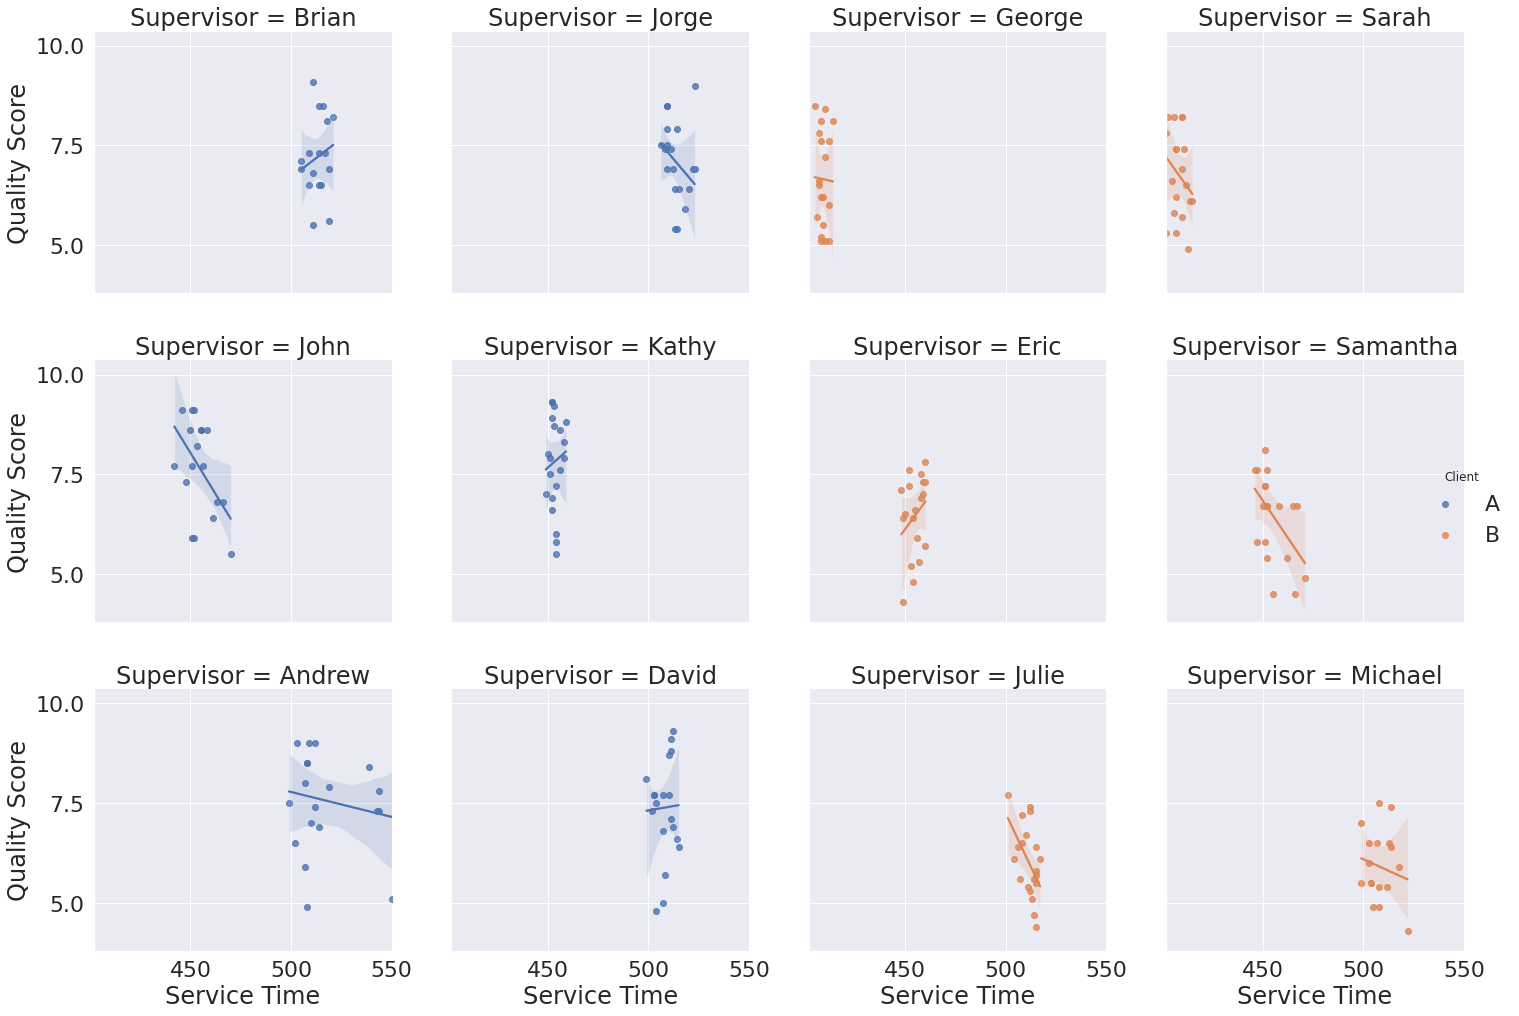

In [ ]:
sns.lmplot(x="Service Time", y="Quality Score", hue ='Client' ,col="Supervisor", data= data, col_wrap=4, robust=True);
sns.set(font_scale=3)
plt.tight_layout()
plt.savefig('Suervisors.jpg')

Plotting the average quality score for each supervisor in decreasing order

Findings:
Kathy has the highest score while Michael has the lowest. From above plot, it is evident that Kathy works with client A and Michael works with client B. 

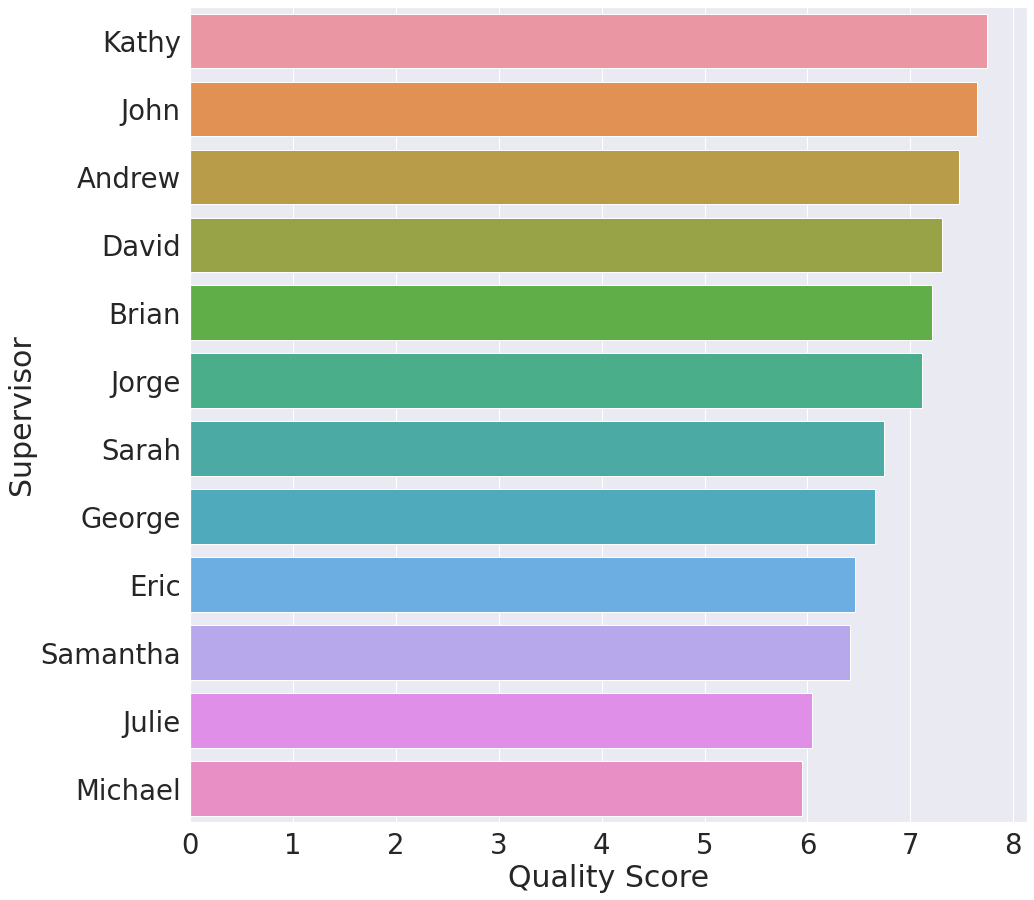

In [ ]:
plt.figure(figsize=(15,15))
sns.set(font_scale=2.5)
df=data.groupby('Supervisor').mean().reset_index().sort_values('Quality Score', ascending = False)
sns.barplot(x="Quality Score", y="Supervisor", data=df, orient='h', order=df.Supervisor.values)
# plt.savefig('Supervisor_performance.jpg')

## 2.5 Relationship betweeen Service time and Quality Score data conditioned on Agent  

Comparing the average Service time and Average Quality score of each agent by bar graphs


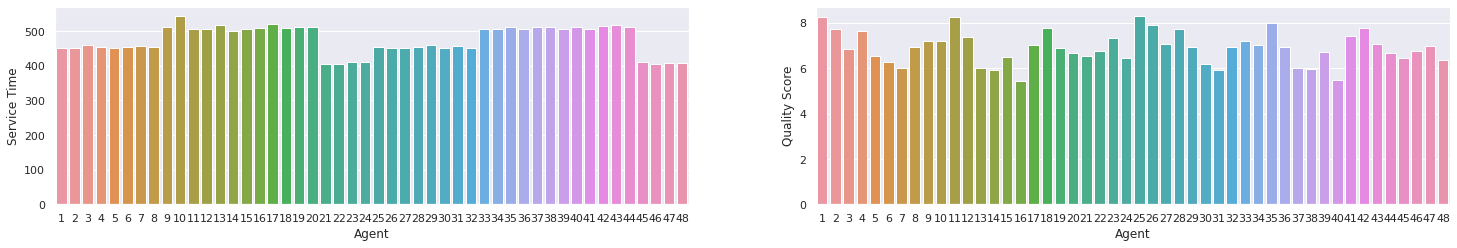

In [ ]:
plt.figure(figsize=(25,8))
plt.subplot(2,2,1)
sns.barplot(x = data.groupby('Agent').mean().index , y = 'Service Time', data = data.groupby('Agent').mean())
plt.subplot(2,2,2)
sns.barplot(x = data.groupby('Agent').mean().index , y = 'Quality Score', data = data.groupby('Agent').mean())

For each Agent, plotting the service time vs quality score.

The plot gives a regression line for each supervisor. Although the regressin lines are fitting the data, the data for each client is very small and nothing can be concluded with certainty.

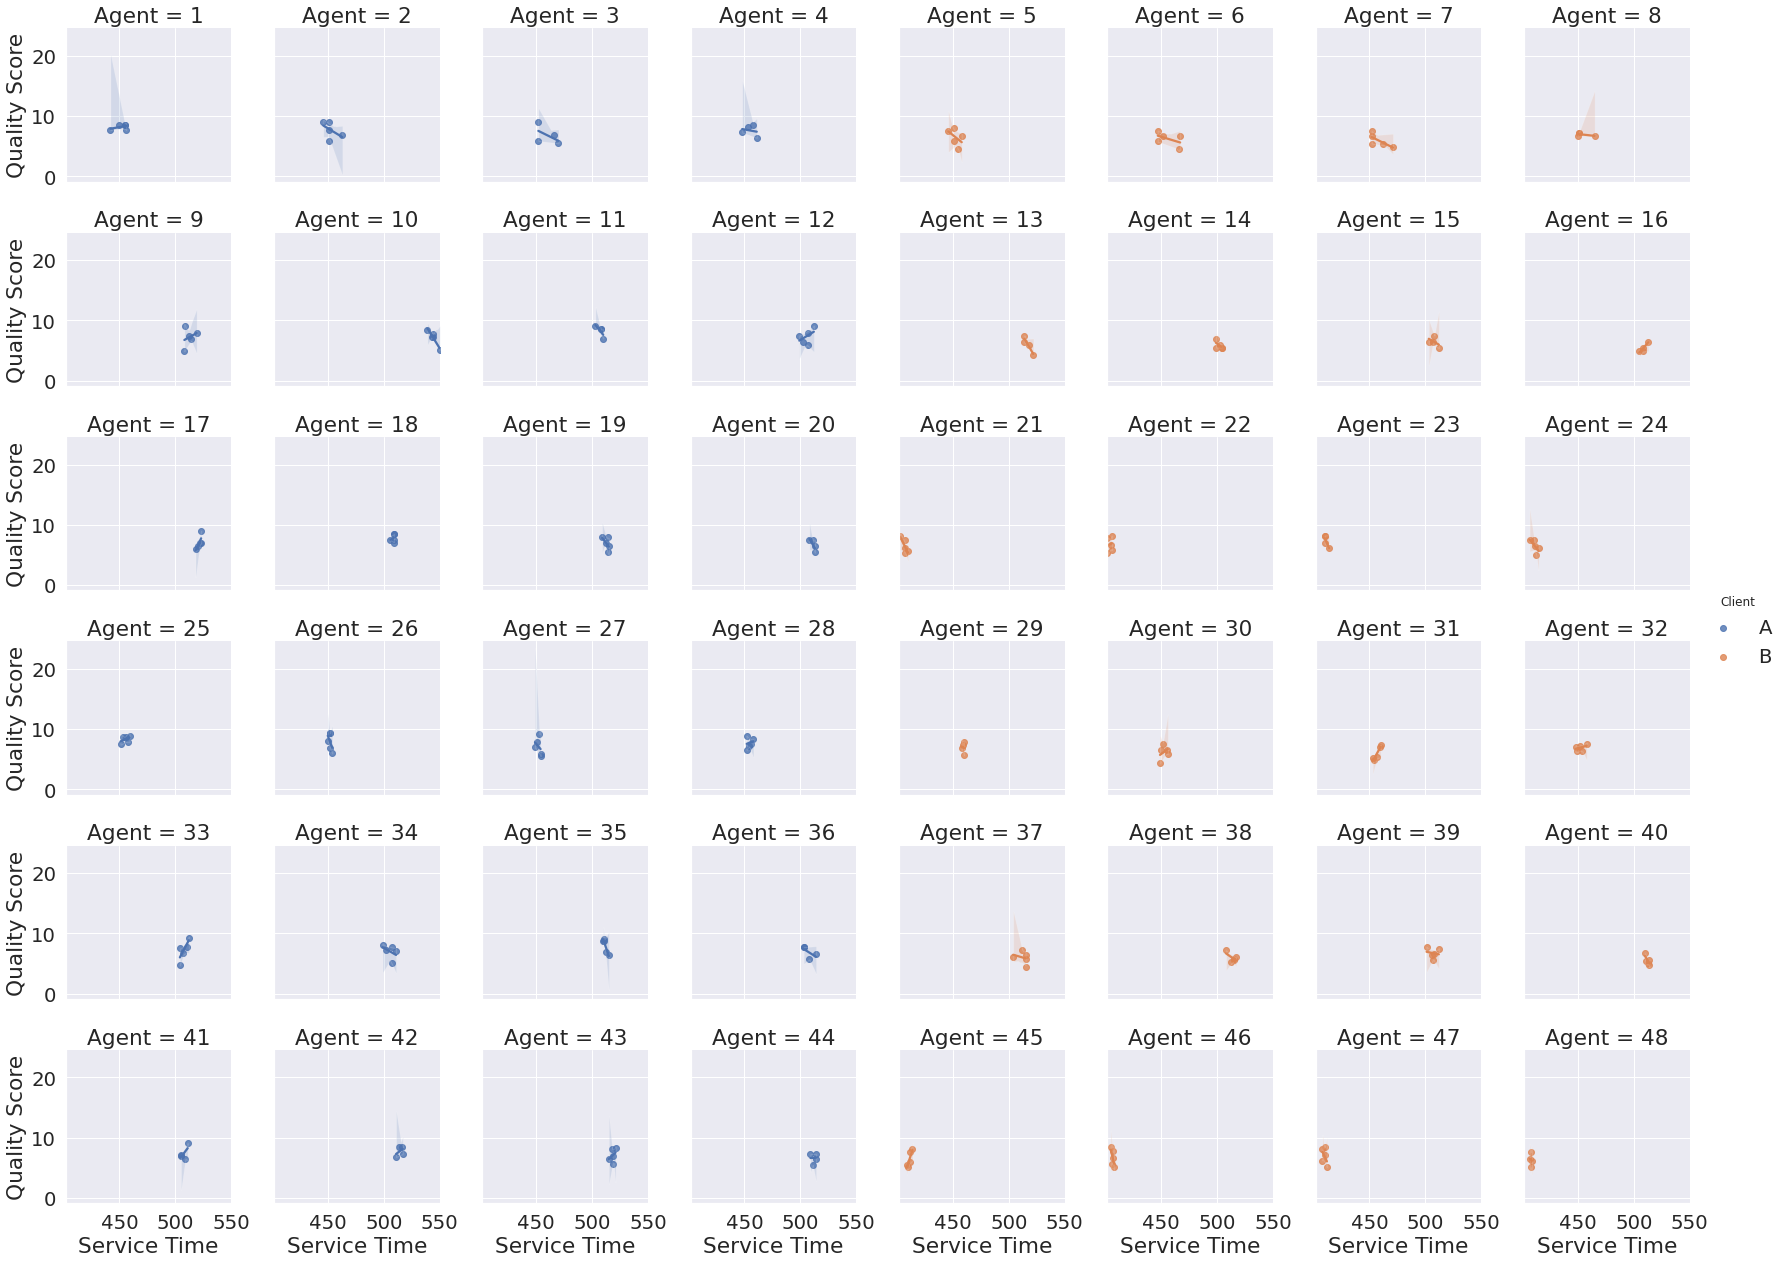

In [ ]:
sns.set(font_scale=1.8)
sns.lmplot(x="Service Time", y="Quality Score", hue = 'Client' ,col="Agent", data= data, col_wrap= 8, height=3);
# plt.savefig('agents.jpg')

In [ ]:
# Correlation between service time and quality score for each agent
for s in sorted(data.Agent.unique()):
  sup = data[data.Agent == s].iloc[:, -2:].corr().iloc[0, 1].round(2)
  print (s, sup)

1 0.41
2 -0.5
3 -0.53
4 -0.2
5 -0.47
6 -0.48
7 -0.7
8 -0.52
9 0.3
10 -0.95
11 -0.81
12 0.47
13 -0.94
14 -0.53
15 -0.47
16 0.93
17 0.74
18 0.22
19 -0.54
20 -0.77
21 -0.76
22 0.16
23 -0.81
24 -0.67
25 0.46
26 -0.48
27 -0.32
28 0.21
29 -0.13
30 0.35
31 0.9
32 0.41
33 0.78
34 -0.42
35 -0.85
36 -0.64
37 -0.25
38 -0.61
39 -0.18
40 -0.75
41 0.63
42 0.43
43 0.36
44 0.03
45 0.86
46 -0.63
47 -0.48
48 -0.12


Plotting mean Quality score for each agent in decreasing order

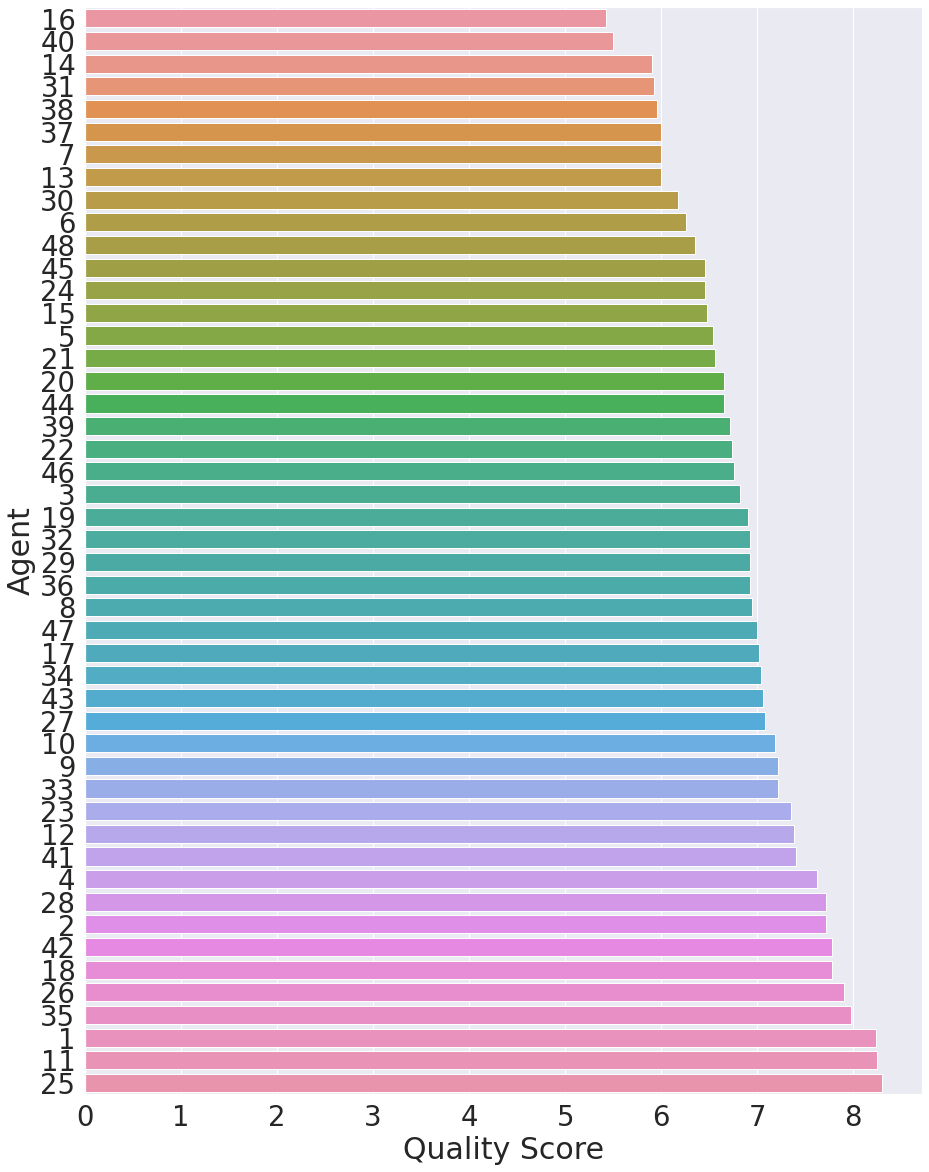

In [ ]:
plt.figure(figsize=(15,20))
sns.set(font_scale=2.5)
df = data.groupby('Agent').mean().sort_values('Quality Score').reset_index().iloc[:, [0,3]]
sns.barplot(x="Quality Score", y="Agent", data=df, orient='h', order=df.Agent.values)
# plt.savefig('Agent_performance1.jpg')

# Section 3: Regression Modeling  and Testing


Creating a multi linear regression model to predict the quality score, given all the other features.

1. Converting the categorical features to one hot encoding
2. Dropping one column from one hot encoding of each feature to avoid dummy variable trap
3. Adding a constant column i.e. 1 to the data  

In [ ]:
data2 = pd.get_dummies(data, columns=['Site', 'Supervisor', 'Client', 'Agent'])
data2.drop(columns=['Site_East', 'Supervisor_Andrew', 'Agent_1', 'Client_A'], inplace=True)
data2['cost'] = 1

In [ ]:
data2['Service Time'] = (data2['Service Time']/60).round(2)

In [ ]:
data2.head(2)

,Week,Service Time,Quality Score,Site_North,Site_South,Supervisor_Brian,Supervisor_David,Supervisor_Eric,Supervisor_Johnathan,Supervisor_Jorge,Supervisor_Julie,Supervisor_Kathy,Supervisor_Michael,Supervisor_Samantha,Supervisor_Sarah,Client_B,Agent_2,Agent_3,Agent_4,Agent_5,Agent_6,Agent_7,Agent_8,Agent_9,Agent_10,Agent_11,Agent_12,Agent_13,Agent_14,Agent_15,Agent_16,Agent_17,Agent_18,Agent_19,Agent_20,Agent_21,Agent_22,Agent_23,Agent_24,Agent_25,Agent_26,Agent_27,Agent_28,Agent_29,Agent_30,Agent_31,Agent_32,Agent_33,Agent_34,Agent_35,Agent_36,Agent_37,Agent_38,Agent_39,Agent_40,Agent_41,Agent_42,Agent_43,Agent_44,Agent_45,Agent_46,Agent_47,Agent_48,cost
0,1,8.48,6.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2,8.42,6.9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
X = data2.drop( columns='Quality Score').values
y = data2['Quality Score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
regressor.coef_

array([ 4.63e-01, -9.33e-01,  3.66e+11,  2.26e+11,  2.07e+11, -1.50e+11,
        2.45e+10, -1.62e+11,  3.61e+11, -7.14e+10, -2.53e+11,  3.88e+11,
        5.36e+10,  2.62e+11, -2.83e+11, -5.61e-01, -1.59e+00, -4.75e-01,
        6.75e+10,  6.75e+10,  6.75e+10,  6.75e+10, -2.22e+10, -2.22e+10,
       -2.22e+10, -2.22e+10, -1.27e+11, -1.27e+11, -1.27e+11, -1.27e+11,
       -1.58e+11, -1.58e+11, -1.58e+11, -1.58e+11,  2.25e+11,  2.25e+11,
        2.25e+11,  2.25e+11,  9.08e+10,  9.08e+10,  9.08e+10,  9.08e+10,
        9.66e+10,  9.66e+10,  9.66e+10,  9.66e+10,  1.28e+11,  1.28e+11,
        1.28e+11,  1.28e+11,  3.32e+11,  3.32e+11,  3.32e+11,  3.32e+11,
       -2.83e+09, -2.83e+09, -2.83e+09, -2.83e+09,  1.26e+11,  1.26e+11,
        1.26e+11,  1.26e+11,  0.00e+00])

Comparing the predicted values with the actual values from the test set

The predicted values are close to actual values for most samples

In [ ]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[8.51 8.9 ]
 [8.98 9.3 ]
 [6.91 7.2 ]
 [9.21 8.7 ]
 [7.98 7.7 ]
 [6.78 6.1 ]
 [6.7  5.8 ]
 [5.09 4.9 ]
 [6.41 6.7 ]
 [8.24 6.5 ]
 [6.73 7.6 ]
 [7.57 7.9 ]
 [6.66 6.6 ]
 [5.83 6.9 ]
 [5.96 6.4 ]
 [7.   5.1 ]
 [7.06 7.6 ]
 [7.58 7.3 ]
 [6.93 8.5 ]
 [6.31 5.4 ]
 [7.1  7.3 ]
 [7.18 6.9 ]
 [7.81 6.6 ]
 [7.29 6.4 ]
 [8.48 7.9 ]
 [6.76 7.  ]
 [7.09 6.  ]
 [6.26 5.1 ]
 [7.7  8.1 ]
 [7.91 6.5 ]
 [9.4  8.5 ]
 [5.   6.7 ]
 [7.51 5.8 ]
 [6.8  8.2 ]
 [7.16 9.1 ]
 [6.46 6.9 ]
 [6.7  7.3 ]
 [7.86 7.2 ]
 [8.99 8.5 ]
 [7.98 7.  ]
 [7.95 7.7 ]
 [8.34 7.3 ]
 [7.11 8.1 ]
 [7.42 7.5 ]
 [7.68 7.8 ]]


Plotting the predicted values and actual values.

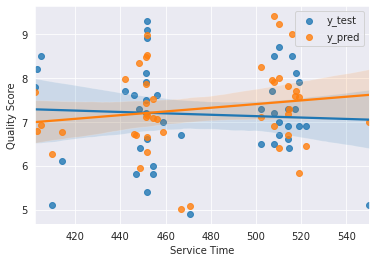

In [ ]:
sns.regplot(x=X_test[:, 1]*60, y=y_test, label='y_test')
sns.regplot(x=X_test[:, 1]*60, y=y_pred, label='y_pred')
plt.legend()
plt.xlabel('Service Time')
plt.ylabel('Quality Score')
plt.savefig('regression.jpg')

Testing the model accuracy with R squared metric

In [ ]:
r2_score(y_test, y_pred)

0.23871319077214348

Finding the p-value for all features to understand the importance of features in predicting the Quality Score (using statsmodel library)

In [ ]:
results = sm.OLS(y, X).fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     6.311
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           4.64e-20
Time:                        22:26:06   Log-Likelihood:                -248.64
No. Observations:                 225   AIC:                             597.3
Df Residuals:                     175   BIC:                             768.1
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4658      0.040     11.609      0.000       0.387       0.545
x2            -1.2861      0.924     -1.392      0.166      -3.110       0.538
x3             2.3544      0.921      2.556      0.011       0.536       4.173
x4             3.4281      1.786      1.920      0.057      -0.096       6.952
x5             3.0994      1.589      1.951      0.053      -0.036       6.235
x6             0.3922      0.188      2.081      0.039       0.020       0.764
x7             0.2197      0.375      0.586      0.559      -0.521       0.960
x8             1.2474      0.302      4.126      0.000       0.651       1.844
x9             2.5271      1.168      2.164      0.032       0.222       4.832
x10           -0.0077      0.375     -0.020      0.984      -0.748       0.733
x11            0.6388      0.189      3.380      0.001       0.266       1.012
x12           -0.1252      0.352     -0.356      0.722      -0.820       0.569
x13            0.2484      0.373      0.667      0.506      -0.487       0.984
x14            1.5111      0.521      2.902      0.004       0.483       2.539
x15           -0.7339      0.288     -2.549      0.012      -1.302      -0.166
x16           -0.4994      0.524     -0.953      0.342      -1.534       0.535
x17           -1.0033      0.570     -1.760      0.080      -2.128       0.122
x18           -0.6588      0.558     -1.180      0.240      -1.761       0.443
x19            0.0458      0.328      0.140      0.889      -0.602       0.693
x20           -0.1571      0.340     -0.462      0.645      -0.828       0.514
x21           -0.3759      0.350     -1.075      0.284      -1.066       0.314
x22            0.7356      0.362      2.031      0.044       0.021       1.450
x23            0.4578      0.380      1.204      0.230      -0.292       1.208
x24            1.0969      0.749      1.464      0.145      -0.382       2.575
x25            1.1456      0.383      2.988      0.003       0.389       1.902
x26            0.4686      0.342      1.372      0.172      -0.206       1.143
x27            0.1967      0.414      0.475      0.635      -0.620       1.014
x28           -0.2294      0.331     -0.692      0.490      -0.883       0.424
x29            0.5823      0.364      1.602      0.111      -0.135       1.300
x30           -0.6749      0.368     -1.836      0.068      -1.400       0.050
x31            1.3492      0.998      1.352      0.178      -0.621       3.319
x32            1.8288      0.811      2.254      0.025       0.228       3.430
x33            1.0466      0.876      1.195      0.234      -0.682       2.775
x34            0.8828      0.868      1.017      0.310      -0.830       2.596
x35            0.1826      0.340      0.538      0.591      -0.488       0.853
x36            0.3112      0.331      0.941      0.348      -0.342       0.964
x3

## Regression testing for each supervisor

In [ ]:
data['Supervisor'].unique()

array(['Brian', 'Jorge', 'George', 'Sarah', 'John', 'Kathy', 'Eric',
       'Samantha', 'Andrew', 'David', 'Julie', 'Michael'], dtype=object)

Running the regression testing to predict the quality score for each supervisor 

1. Dropped Client, Site and Supervisor columns, since for each supervisor, these variables do not change
2. Converting the categorical variables to one hot encoding
3. Dropping one of the columns from one hot encoded columns to avoid dmmy variable trap
4. Feature scaling : converted the service time to seconds
5. Storing the results into alist for future analysis 

In [ ]:
results = []
for s in data.Supervisor.unique():
  print(s)
  sup = data[data.Supervisor == s]

  sup.drop(columns=['Client', 'Site', 'Supervisor'], inplace=True)

  sup  =pd.get_dummies(sup, columns=['Agent'])
  sup.drop( columns=sup.columns[3]) # to avoid dummy trap

  sup['Service Time'] = (sup['Service Time'] / 60).round(2)

  X = sup.drop( columns='Quality Score').values
  y = sup['Quality Score'].values

  result = sm.OLS(y, X).fit()
  results.append((s, result.pvalues[1].round(2)))

  print(result.summary())

Brian


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     5.400
Date:                Fri, 12 Jun 2020   Prob (F-statistic):            0.00946
Time:                        17:04:43   Log-Likelihood:                -13.121
No. Observations:                  17   AIC:                             38.24
Df Residuals:                      11   BIC:                             43.24
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4580      0.115      3.989      0.0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In [ ]:
results

[('Brian', 0.26),
 ('Jorge', 0.77),
 ('George', 0.6),
 ('Sarah', 0.31),
 ('John', 0.77),
 ('Kathy', 0.48),
 ('Eric', 0.71),
 ('Samantha', 0.82),
 ('Andrew', 0.49),
 ('David', 0.44),
 ('Julie', 0.36),
 ('Michael', 0.47)]

## Regressin testing for each agent

Running the regression testing to predict the quality score for each supervisor 

1. Dropped Client, Site, Supervisor and Agent columns, since for each supervisor, these variables do not change
2. Converting the categorical variables to one hot encoding
3. Dropping one of the columns from one hot encoded columns to avoid dmmy variable trap
4. Feature scaling : converted the service time to seconds
5. Storing the results into alist for future analysis 

In [ ]:
results= []
for a in sorted(data.Agent.unique()):
  print(a)
  agent = data[data.Agent == a]

  # dropping constant variables
  agent.drop(columns=['Client', 'Site', 'Supervisor', 'Agent'], inplace=True)

  # feature scaling the service time, converting it to mins
  agent['Service Time'] = (agent['Service Time'] / 60).round(2)

  # Quality Score as y, all other variables as X
  X = agent.drop( columns='Quality Score').values
  y = agent['Quality Score'].values

  result = sm.OLS(y, X).fit()
  results.append((a, result.pvalues[1].round(2)))

  print(result.summary())

1
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              2314.
Date:                Thu, 11 Jun 2020   Prob (F-statistic):                    1.65e-05
Time:                        12:36:53   Log-Likelihood:                         0.70782
No. Observations:                   5   AIC:                                      2.584
Df Residuals:                       3   BIC:                                      1.803
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid 

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              66.37
Date:                Thu, 11 Jun 2020   Prob (F-statistic):                      0.0148
Time:                        12:36:54   Log-Likelihood:                         -4.8648
No. Observations:                   4   AIC:                                      13.73
Df Residuals:                       2   BIC:                                      12.50
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


In [ ]:
results

[(1, 0.0),
 (2, 0.0),
 (3, 0.09),
 (4, 0.02),
 (5, 0.04),
 (6, 0.03),
 (7, 0.01),
 (8, 0.0),
 (9, 0.03),
 (10, 0.02),
 (11, 0.03),
 (12, 0.02),
 (13, 0.05),
 (14, 0.0),
 (15, 0.03),
 (16, 0.02),
 (17, 0.01),
 (18, 0.0),
 (19, 0.01),
 (20, 0.04),
 (21, 0.01),
 (22, 0.01),
 (23, 0.02),
 (24, 0.02),
 (25, 0.0),
 (26, 0.0),
 (27, 0.03),
 (28, 0.0),
 (29, 0.04),
 (30, 0.03),
 (31, 0.01),
 (32, 0.0),
 (33, 0.04),
 (34, 0.02),
 (35, 0.0),
 (36, 0.04),
 (37, 0.01),
 (38, 0.01),
 (39, 0.01),
 (40, 0.01),
 (41, 0.02),
 (42, 0.01),
 (43, 0.01),
 (44, 0.02),
 (45, 0.01),
 (46, 0.02),
 (47, 0.0),
 (48, 0.06)]